**DA IMPORTAÇÃO DE DADOS LABORATORIAIS, LIMPEZA E VISUALIZAÇÃO.**

# Bibliotecas Necessárias 

In [85]:
import pandas as pd
import numpy as np

import seaborn as sns
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


# Acesso aos arquivos no Google Driver
Os dados sobre exames laboratoriais estão disponíveis no Github
https://github.com/romsiq/GuiaParaCriar

In [87]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 aula1.pbix
 aula3.pbix
'Colab Notebooks'
 Concessionarias.csv
 ConcessionariasXMarcas.xlsx
'Cópia de Competitive Analysis Template - Shopify.gsheet'
 darknet
 dataset_hospital.xlsx
 detalhe_pedido.xlsx
'Historia da Maquiagem Decada 30.pptx'
'Lojas Maquiagem.gsheet'
 modelo_google
 models-master
'My Drive'
 Pedidos2016.xlsx
 Pedidos2017.xlsx
 Pedidos2018.xlsx
 Pedidos2019.xlsx
 puffinbrowser
 Tendencias_2019.pdf
 umidade
 VeiculosXFabricantes.xlsx
 vendedores.txt
'Visao Computacional - Saulo'
 yolov3


Leitura dos dados laboratoriais arquivo excel

In [88]:
dados = pd.read_excel('/content/gdrive/My Drive/dataset_hospital.xlsx')

**Análise Exploratória dos Dados**

In [89]:
dados.head()  #Apresentando os primeiros registros dos dados

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
list(dados.columns.values)  #Conhecendo os nomes das variáveis

['Patient ID',
 'Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',

In [92]:
dados.shape  #Apresentando o total de linhas e colunas da base de dados

(5644, 111)

Vamos conhecer a quantidade de atributos dos dados e suas classificações

In [66]:
print('No. de atributos Numéricos: ', dados.select_dtypes(exclude = ['object']).columns.size)

No. de atributos Numéricos:  74


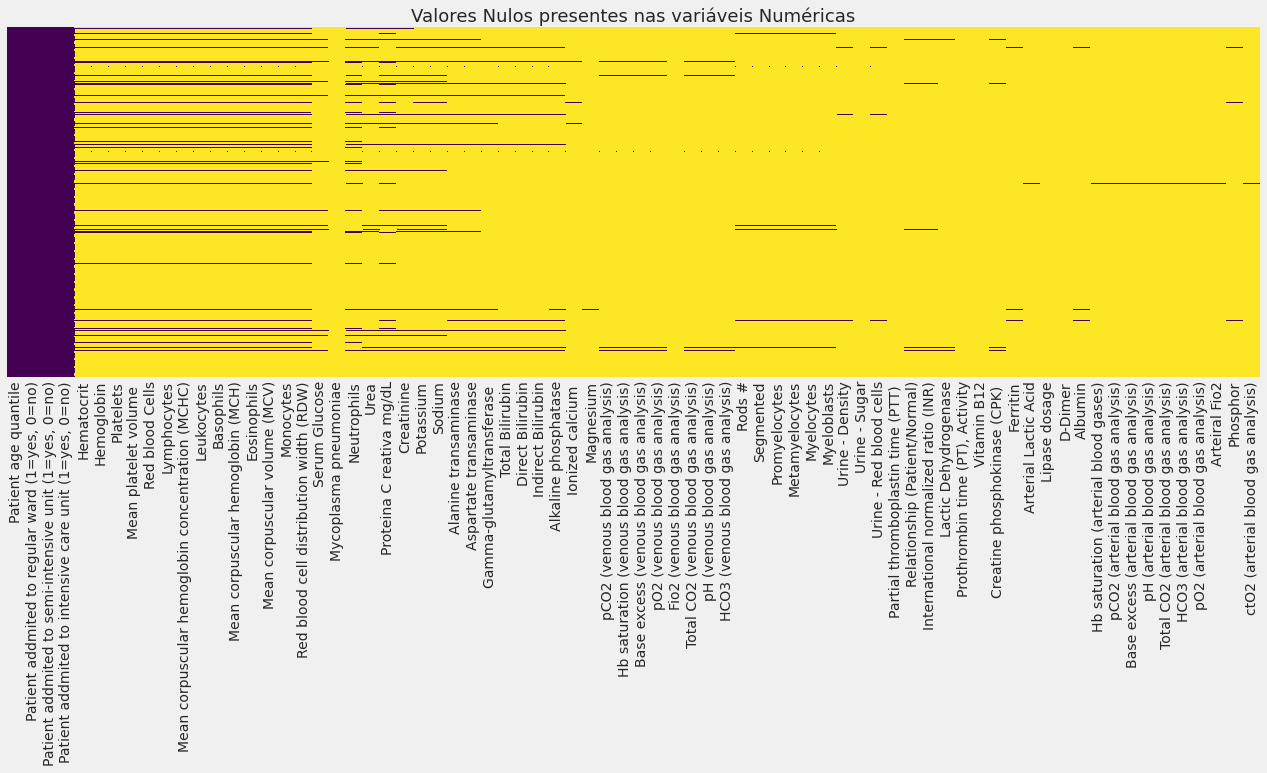

In [67]:
plt.figure(figsize=(20,6))
sns.heatmap(dados.select_dtypes(include=['int64','float64']).isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.title('Valores Nulos presentes nas variáveis Numéricas',fontsize=18)
plt.show()

In [68]:
print('No. de atributos Categóricos: ', dados.select_dtypes(exclude = ['int64','float64']).columns.size)

No. de atributos Categóricos:  37


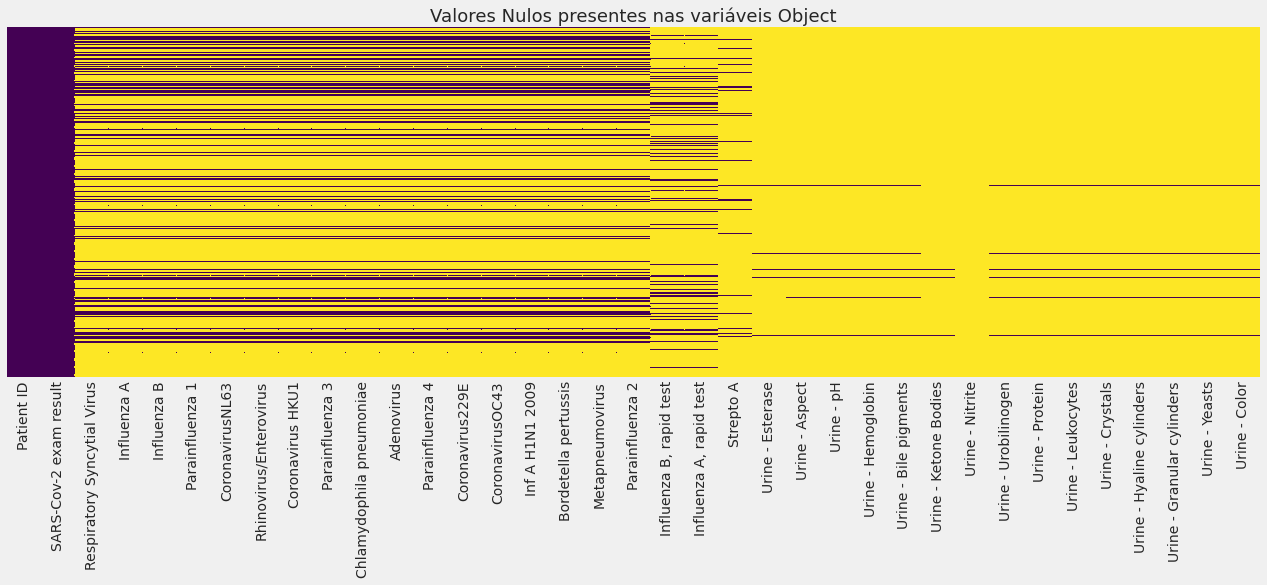

In [69]:
plt.figure(figsize=(20,6))
sns.heatmap(dados.select_dtypes(include=['object']).isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.title('Valores Nulos presentes nas variáveis Object',fontsize=18)
plt.show()

Tratando os valores nulos

In [70]:
dados = dados.fillna(0)  #Preencher os valores nulos com 0 

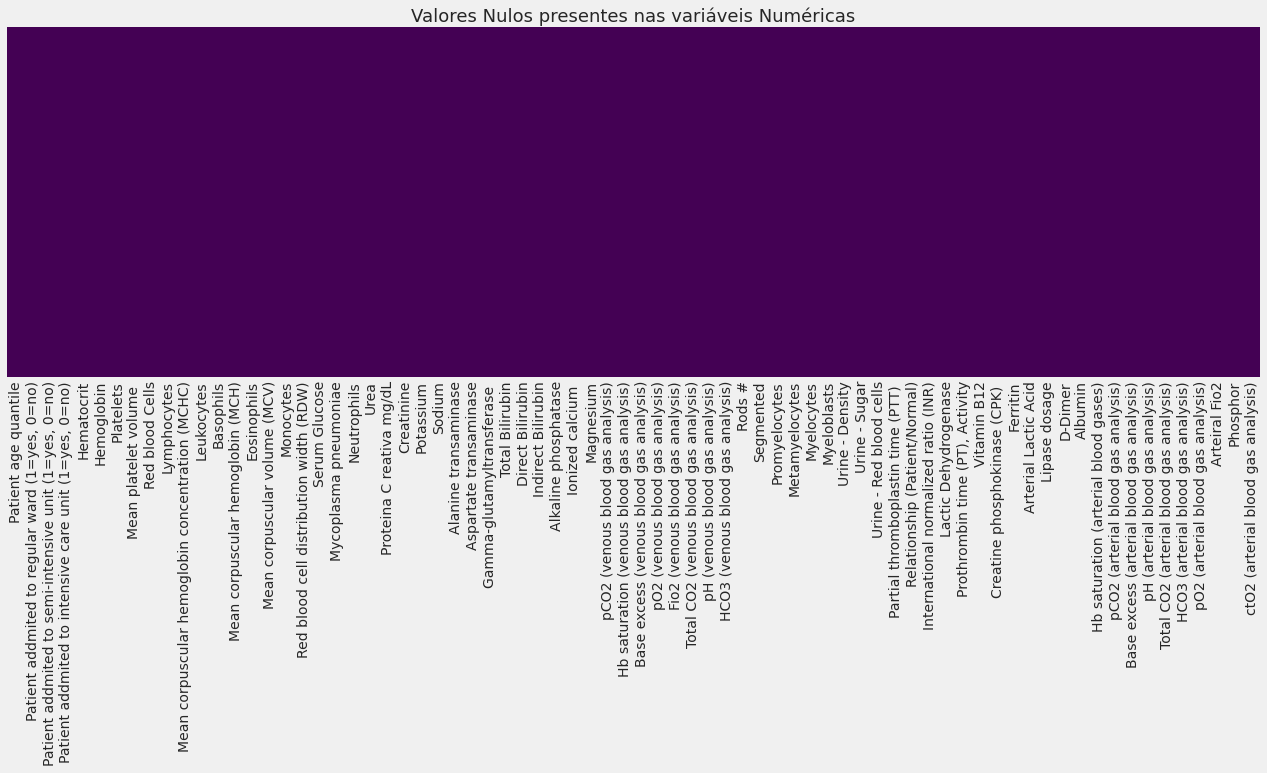

In [71]:
plt.figure(figsize=(20,6))
sns.heatmap(dados.select_dtypes(include=['int64','float64']).isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.title('Valores Nulos presentes nas variáveis Numéricas',fontsize=18)
plt.show()

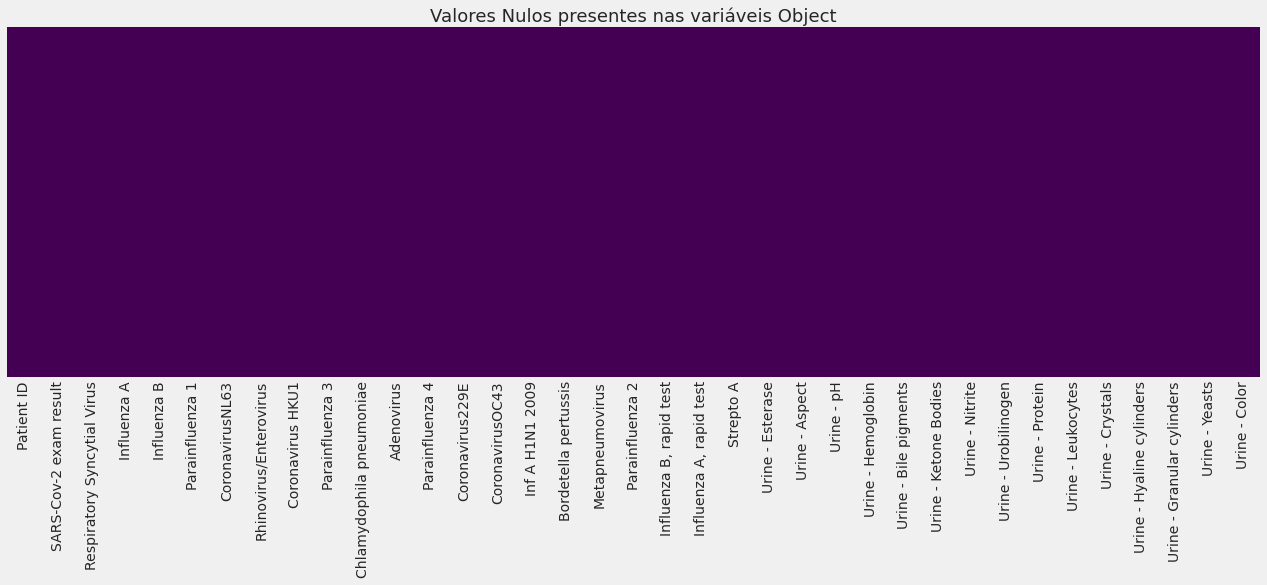

In [72]:
plt.figure(figsize=(20,6))
sns.heatmap(dados.select_dtypes(include=['object']).isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.title('Valores Nulos presentes nas variáveis Object',fontsize=18)
plt.show()

In [73]:
# Vamos verificar os valores unicos da variável principal que é o resultado do exame de covid - positivo ou negativo e 
# realizar o agrupamento.
dados['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [74]:
dados.groupby(['SARS-Cov-2 exam result']).count()

,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
negative,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,...,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086,5086
positive,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,...,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558


Transformando a variável do resultado do exame de negativo e positivo para 0 e 1.

In [75]:
# 'SARS-Cov-2 exam result' #negativo 0 e positivo 1

def transforma(s):
        if s == 'negative':
            return 0
        elif s == 'positive':
            return 1
        
dados['SARS-Cov-2 exam result'] = dados['SARS-Cov-2 exam result'].apply(transforma)

In [76]:
# Como excluir variáveis que você entende que tem pouca representatividade ? Veja:

dados.drop('Mycoplasma pneumoniae', axis = 1, inplace=True)
dados.drop('Fio2 (venous blood gas analysis)', axis = 1, inplace=True)
dados.drop('Promyelocytes', axis = 1, inplace=True)
dados.drop('Myeloblasts', axis = 1, inplace=True)
dados.drop('Partial thromboplastin time\xa0(PTT)\xa0', axis = 1, inplace=True)
dados.drop('Prothrombin time (PT), Activity', axis = 1, inplace=True)
dados.drop('D-Dimer', axis = 1, inplace=True)
dados.drop('Urine - Sugar', axis = 1, inplace=True)

Transformando o resultado de algumas variaveis categóricas para resultado 0 ou 1. 

In [77]:
def transformacao(s):
        if s == 'not_detected':
            return 0
        if s == 'None':
            return 0
        elif s == 'detected':
            return 1
        elif s == 'negative':
            return 0
        elif s == 'positive':
            return 1
        
#DICIONÁRIO DE DADOS: # 0 not-detected, 1 detected
dados['Respiratory Syncytial Virus'] = dados['Respiratory Syncytial Virus'].apply(transformacao)
dados['Influenza A'] = dados['Influenza A'].apply(transformacao)
dados['Influenza B'] = dados['Influenza B'].apply(transformacao)
dados['Parainfluenza 1'] = dados['Parainfluenza 1'].apply(transformacao)
dados['CoronavirusNL63'] = dados['CoronavirusNL63'].apply(transformacao)
dados['Rhinovirus/Enterovirus'] = dados['Rhinovirus/Enterovirus'].apply(transformacao)
dados['Coronavirus HKU1'] = dados['Coronavirus HKU1'].apply(transformacao)
dados['Parainfluenza 3'] = dados['Parainfluenza 3'].apply(transformacao)
dados['Chlamydophila pneumoniae'] = dados['Chlamydophila pneumoniae'].apply(transformacao)
dados['Adenovirus'] = dados['Adenovirus'].apply(transformacao)
dados['Parainfluenza 4'] = dados['Parainfluenza 4'].apply(transformacao)
dados['Coronavirus229E'] = dados['Coronavirus229E'].apply(transformacao)
dados['CoronavirusOC43'] = dados['CoronavirusOC43'].apply(transformacao)
dados['Inf A H1N1 2009'] = dados['Inf A H1N1 2009'].apply(transformacao)
dados['Bordetella pertussis'] = dados['Bordetella pertussis'].apply(transformacao)
dados['Metapneumovirus'] = dados['Metapneumovirus'].apply(transformacao)
dados['Parainfluenza 2'] = dados['Parainfluenza 2'].apply(transformacao)
    
    
#DICIONÁRIO DE DADOS: # 0 negative, 1 positive    
dados['Influenza B, rapid test'] = dados['Influenza B, rapid test'].apply(transformacao)
dados['Influenza A, rapid test'] = dados['Influenza A, rapid test'].apply(transformacao)

SELECIONANDO ALGUMAS VARIÁVEIS E VERIFICANDO A DISTRIBUIÇÃO DOS DADOS E ESTATÍSTICAS

In [80]:
dados.describe()  #Algumas estatísitcas

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,...,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Metamyelocytes,Myelocytes,Urine - Density,Urine - Red blood cells,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,1354.000000,1354.000000,1354.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.0,5.644000e+03,5.644000e+03,5.644000e+03,...,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03
mean,9.318391,0.098866,0.013997,0.008859,0.007264,-2.335732e-10,-1.710835e-09,-3.770503e-11,7.894130e-10,8.985679e-10,-8.390814e-10,1.082473e-10,6.629928e-10,-7.075675e-10,-3.683047e-10,7.686216e-10,-4.432198e-10,-3.428930e-10,1.088413e-09,2.605525e-10,0.038405,0.013294,0.056869,0.002219,0.033284,0.280325,0.014793,0.007396,0.006657,0.009615,0.014053,0.006657,0.005917,0.072485,0.001479,0.010355,0.0,5.370286e-10,-4.695390e-10,2.492080e-10,...,-2.178146e-11,-4.009769e-11,-8.976603e-11,3.887661e-10,9.768656e-11,-5.197849e-11,1.689714e-10,-3.696248e-11,-4.663213e-10,3.636844e-10,-2.590674e-11,-1.905878e-10,-2.197948e-10,8.658957e-11,-1.064322e-10,4.488302e-11,-4.603809e-10,1.478499e-10,2.376160e-10,-3.168213e-11,9.372630e-11,-1.584106e-11,-1.115475e-10,3.102208e-11,-1.056071e-11,-1.194680e-10,2.970200e-11,-7.920532e-12,-5.280355e-12,-1.320089e-11,-6.600441e-13,4.026270e-11,-7.920532e-12,1.980133e-12,-3.574553e-11,2.904195e-11,-1.181479e-10,1.650111e-11,2.244151e-11,2.508169e-11
std,5.777903,0.298509,0.117489,0.093713,0.084929,3.268915e-01,3.268915e-01,3.266203e-01,3.258055e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01,3.266203e-01

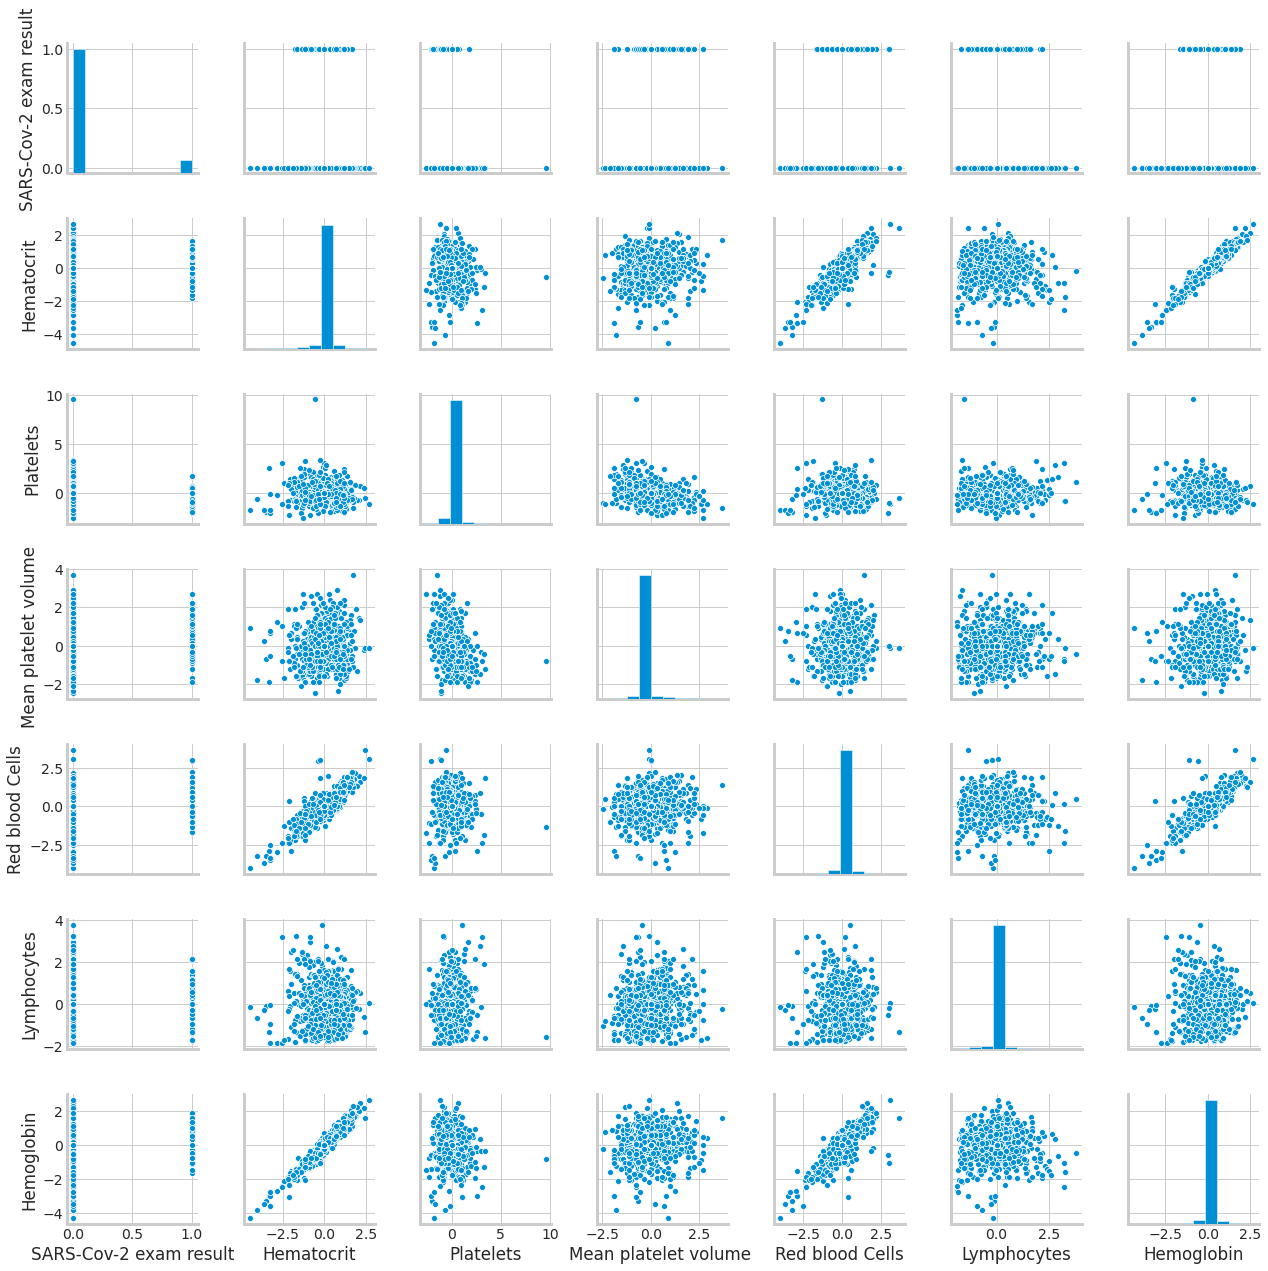

In [78]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','Hematocrit', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Hemoglobin']
sns.pairplot(dados[cols])
plt.show()

In [81]:
# Definindo uma função que irá contar a quantidade de exames positivos e negativos, estruturar em um dataframe para ser plotado.

def bar_chart(feature):
    positivo = dados[dados['SARS-Cov-2 exam result']==1][feature].value_counts()
    negativo = dados[dados['SARS-Cov-2 exam result']==0][feature].value_counts()
    df = pd.DataFrame([positivo,negativo])
    df.index = ['positivo','negativo']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

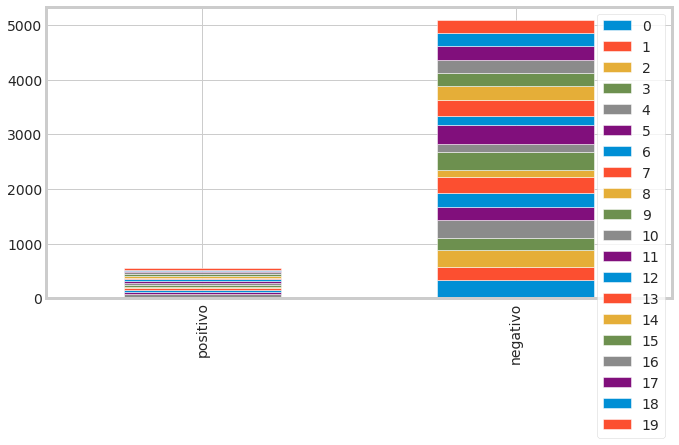

In [82]:
# Chamando a função aplicando sobre a variável Patient age quantile

bar_chart('Patient age quantile')

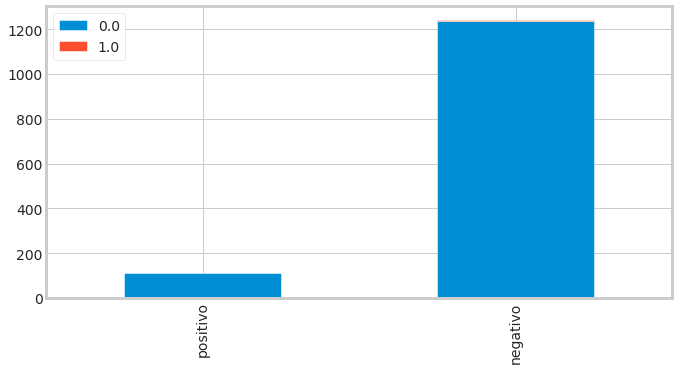

In [83]:
bar_chart('Parainfluenza 1')

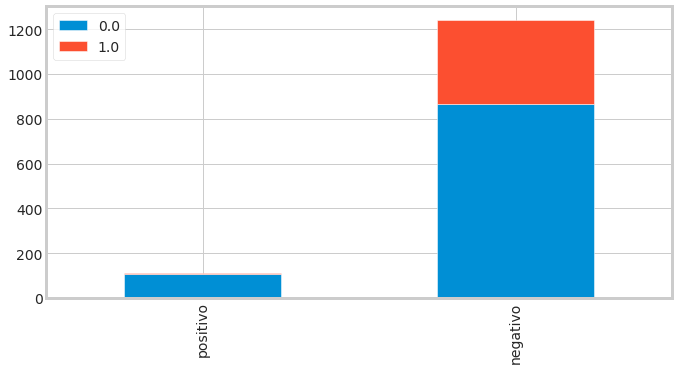

In [84]:
bar_chart('Rhinovirus/Enterovirus')